In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Verileri yükleme
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [5]:
# İlk birkaç satırı inceleme
print("Train Veri Seti:")
print(train_df.head())
print("\nTest Veri Seti:")
print(test_df.head())

Train Veri Seti:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

Train Veri Setindeki Eksik Değerler:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Test Veri Setindeki Eksik Değerler:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinS

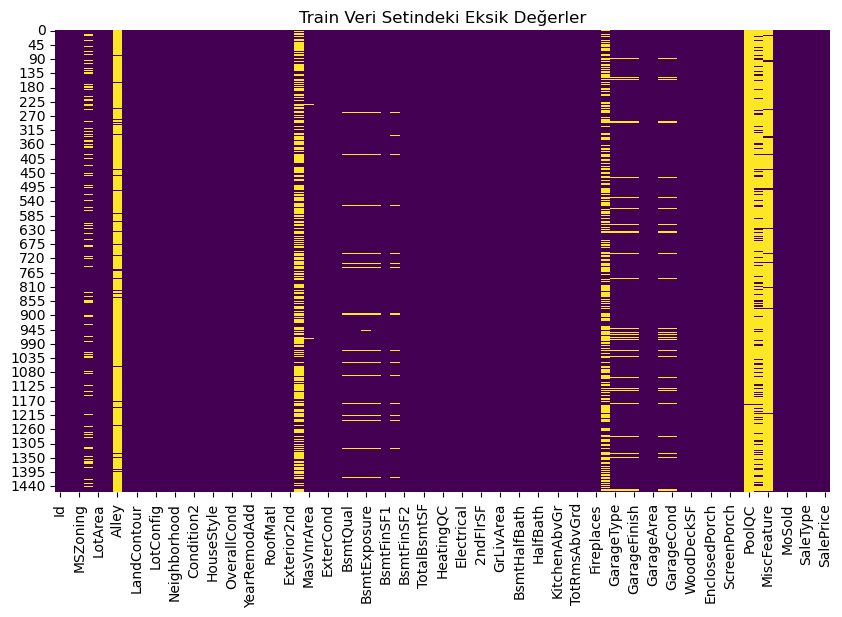

In [6]:
# Eksik değerleri kontrol etme
missing_train = train_df.isnull().sum().sort_values(ascending=False)
missing_test = test_df.isnull().sum().sort_values(ascending=False)

print("Train Veri Setindeki Eksik Değerler:\n", missing_train[missing_train > 0])
print("\nTest Veri Setindeki Eksik Değerler:\n", missing_test[missing_test > 0])

# Eksik değerleri görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Train Veri Setindeki Eksik Değerler")
plt.show()

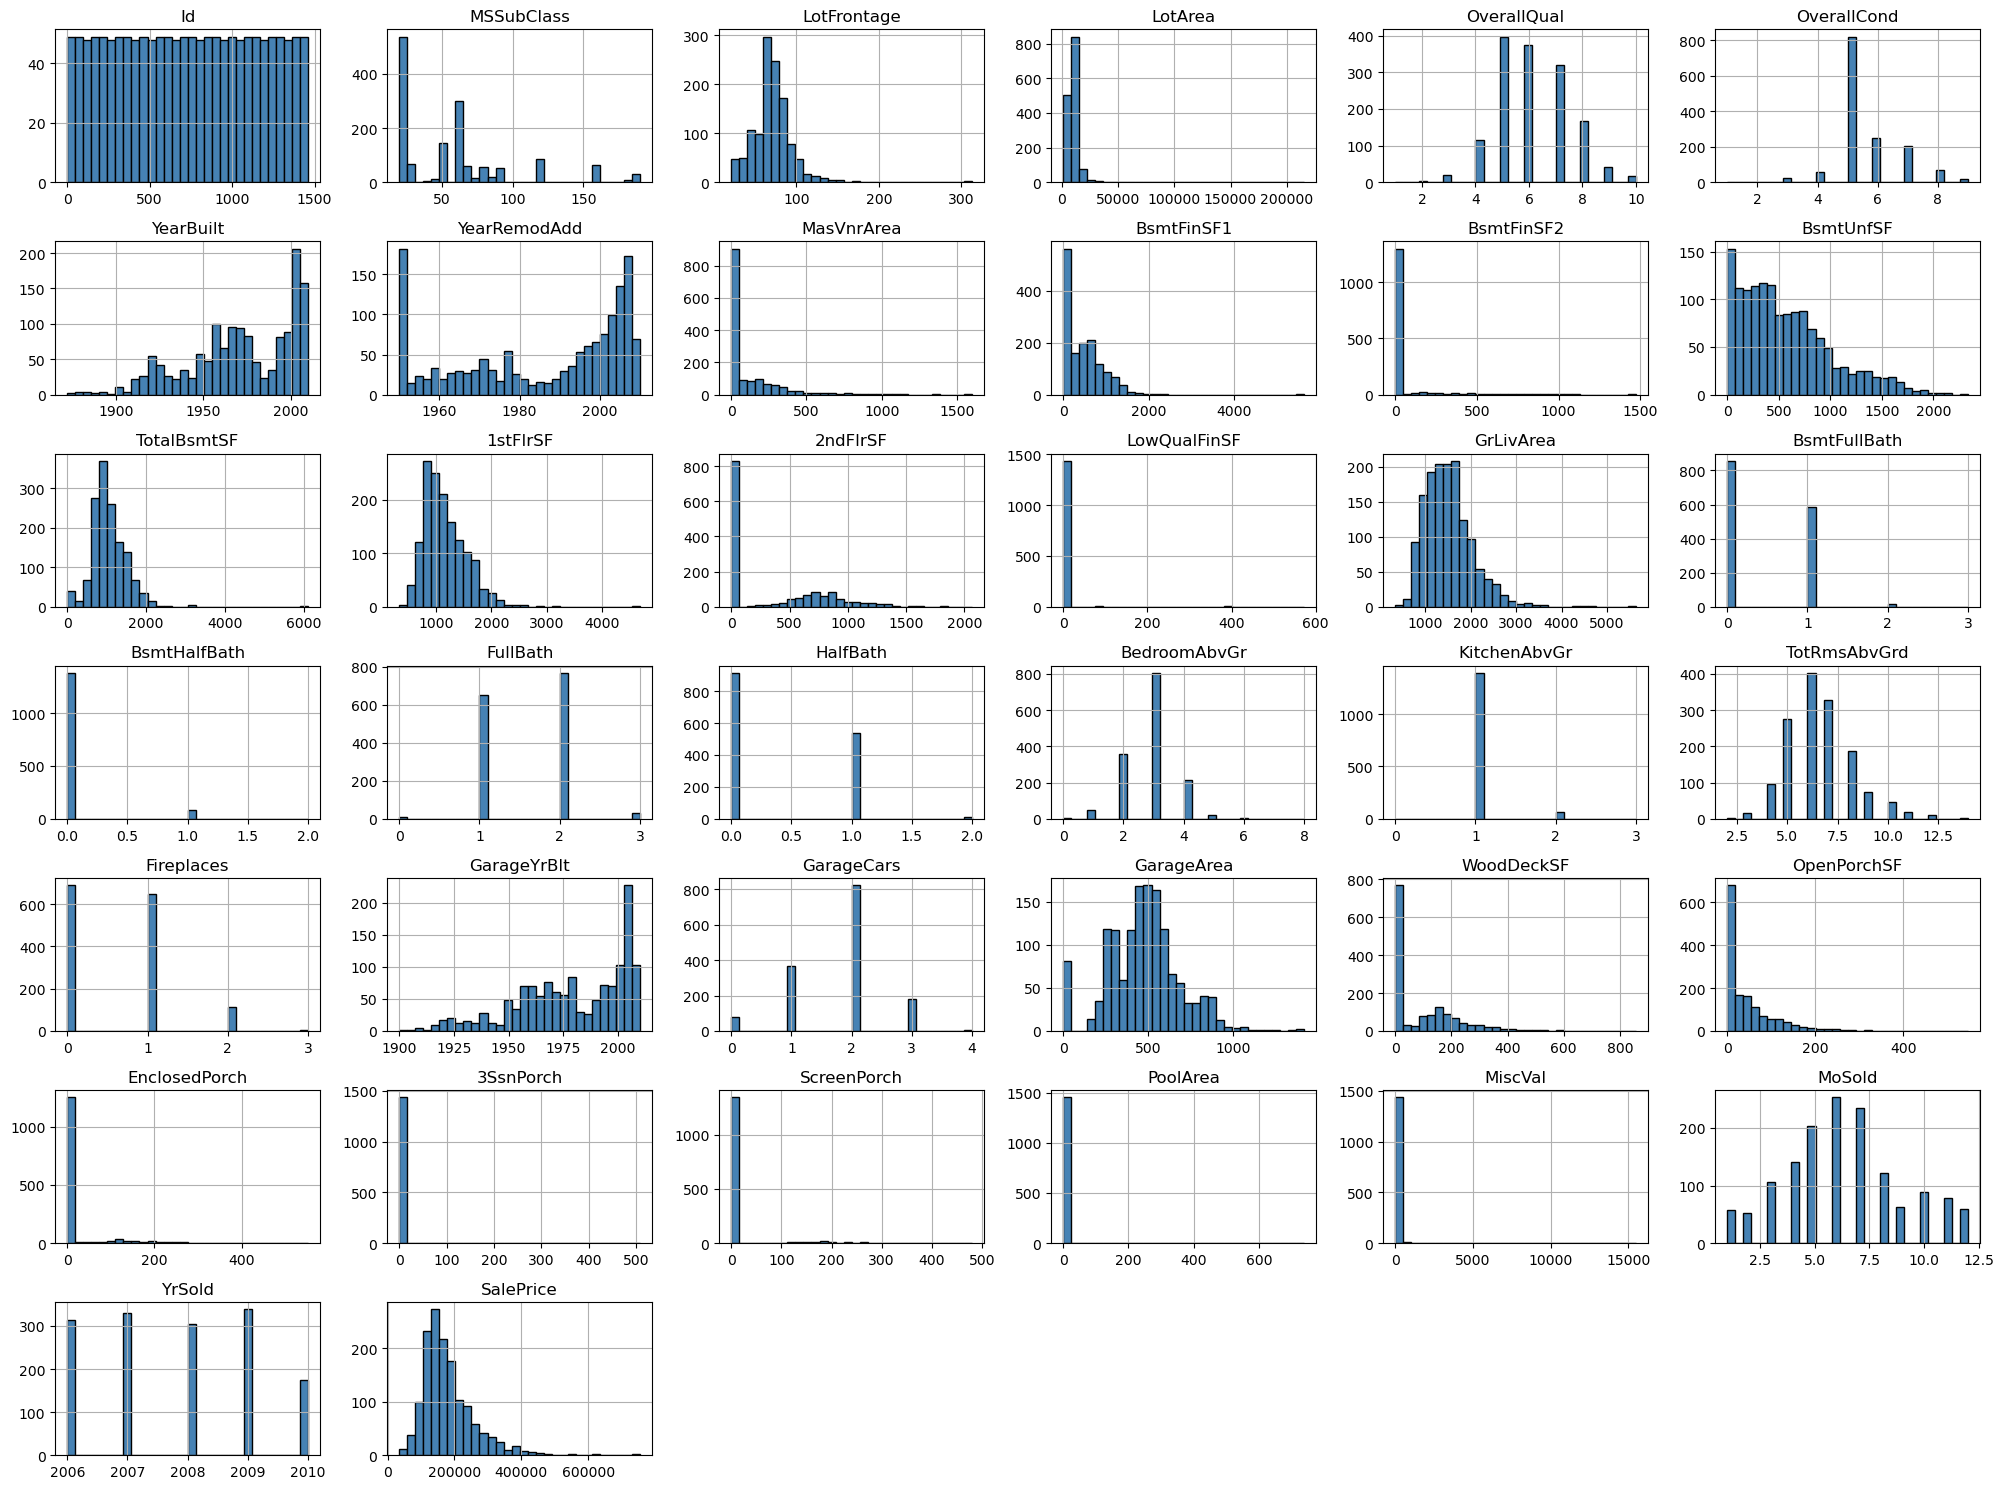

In [7]:
train_df.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()


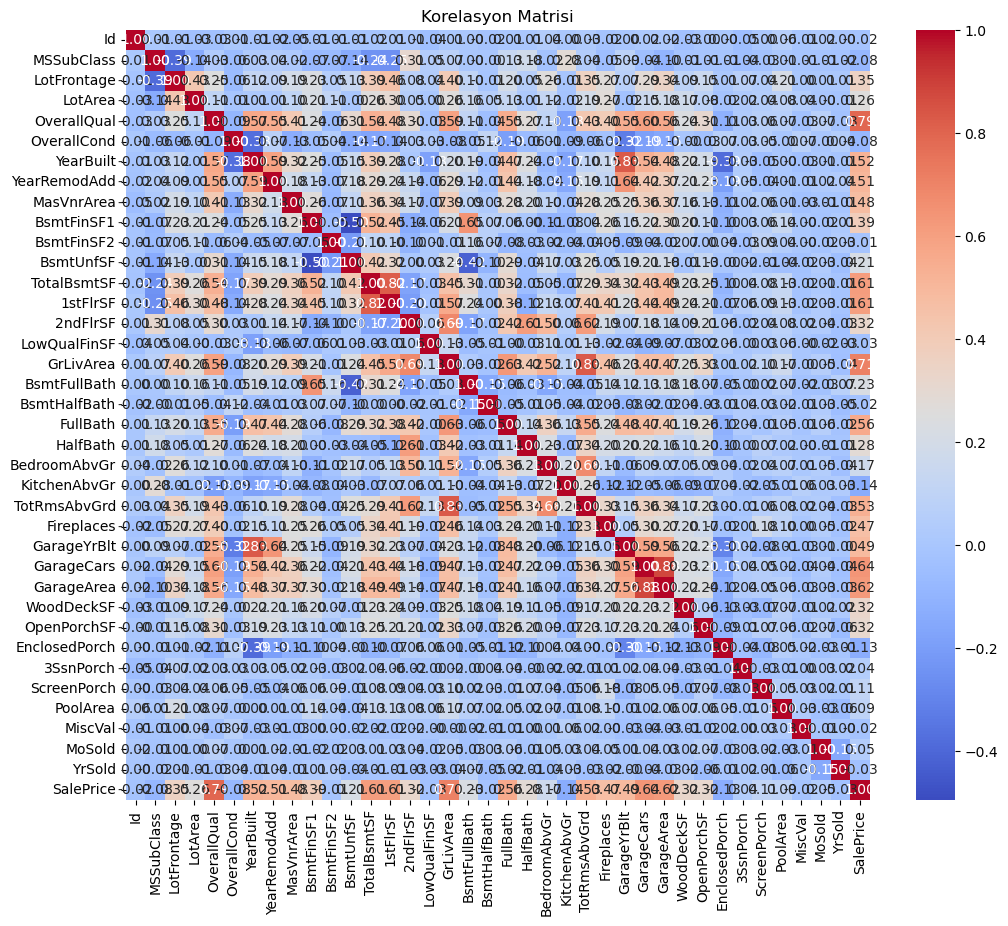

In [9]:
# Sadece sayısal sütunları seç
numeric_df = train_df.select_dtypes(include=['number'])

# Korelasyon matrisini hesapla
corr_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


In [12]:
print(train_df.columns)
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
# Sayısal sütunlardaki eksik değerleri doldur
numeric_cols_train = train_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols_train:
    train_df[col] = train_df[col].fillna(train_df[col].mean())

# test_df için sayısal sütunlardaki eksik değerleri doldur
numeric_cols_test = test_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols_test:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

# Kategorik sütunlardaki eksik değerleri doldur
categorical_cols_train = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols_train:
    train_df[col] = train_df[col].fillna('None')

categorical_cols_test = test_df.select_dtypes(include=['object']).columns

for col in categorical_cols_test:
    test_df[col] = test_df[col].fillna('None')


In [14]:
# Eğitim veri setindeki eksik değerlerin kontrolü
print("Train veri setindeki eksik değer sayısı:")
print(train_df.isnull().sum())

# Test veri setindeki eksik değerlerin kontrolü
print("\nTest veri setindeki eksik değer sayısı:")
print(test_df.isnull().sum())


Train veri setindeki eksik değer sayısı:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Test veri setindeki eksik değer sayısı:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("Kategorik sütunlar:", categorical_cols)


Kategorik sütunlar: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
# Kategorik değişkenleri dummies ile sayısallaştırma
train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

# Eğitim ve test veri setlerindeki sütunların aynı olduğundan emin olun
train_df, test_df = train_df.align(test_df, join='left', axis=1)


In [19]:
# Eğitim veri setinden özellik ve hedef sütunlarını ayırın
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Eğitim ve doğrulama veri setlerini ayırın
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Doğrulama veri setinde tahmin yap
y_pred = model.predict(X_valid)
print("Doğrulama veri setindeki tahminler:", y_pred)


Doğrulama veri setindeki tahminler: [142218.5  334533.16 118429.25 152125.5  322772.68  85596.   212250.67
 149375.36  85092.99 130512.08 156992.   120593.82 113052.64 206097.05
 179552.85 131909.   194412.95 135616.5  114017.5  207755.55 156060.55
 223790.01 175065.24 124781.84 196545.45 175996.97 183483.5  107608.83
 177745.8  193490.76 122989.   247870.1  174313.39 109257.5  255292.83
 148794.5  139204.3  205438.64 308402.46 108031.3  124181.5  232271.73
 120006.16 358149.44 135226.5  151067.74 117219.14 129168.5  378806.21
 146995.79 122363.39 194803.78 126724.53 357485.97 139765.1  234460.92
 196927.3  149823.37 144956.47 115520.34  75073.5  149571.   307114.76
 283983.78 283906.03 209506.22 111327.5  314409.95 114587.75 163655.34
 132219.06 130743.38 111269.    90704.   445378.26 174941.31 313381.96
 293739.31 136898.75 125099.84 102915.   101471.   128968.5  103081.03
 155583.26 134921.21 253320.5  198622.96 140621.85 178148.07 140263.28
 162631.5  122493.6  254356.11 123839.93 